In [2]:
# Imports and plotting setups
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math

import sys, os
sys.path.insert(0, '../../')
sys.path.insert(0, '../')

import math_funcs

from cycler import cycler

default_cycler = (cycler(color=['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', 'black']) +
                cycler(linestyle=['-', '--', ':', '-.', '-', '--', ':']))

plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=default_cycler)

plt.rcParams["font.family"] = "Times"
plt.rcParams["font.size"] = 8

plt.rcParams['figure.figsize'] = (3.5, 2.5)
plt.rcParams['figure.dpi'] = 200

plt.rcParams['text.usetex'] = True

from scipy.constants import (
    epsilon_0,   # Permittivity of free space (vacuum)
    mu_0,        # Permeability of free space (vacuum)
    c,           # Speed of light in vacuum
    #e,           # Elementary charge
    #h,           # Planck constant
    #hbar,        # Reduced Planck constant (h-bar)
    k,           # Boltzmann constant
    #G,           # Newtonian constant of gravitation
    #m_e,         # Electron mass
    #m_p,         # Proton mass
    #m_n,         # Neutron mass
    #alpha,       # Fine-structure constant
    eV,          # Electron volt
)

# Example usage of some constants
print(f"Permittivity of free space: {epsilon_0} F/m")
print(f"Permeability of free space: {mu_0} N/A^2")
print(f"Speed of light in vacuum: {c} m/s")
# print(f"Elementary charge: {e} C")
# print(f"Planck constant: {h} J·s")
# print(f"Reduced Planck constant: {hbar} J·s")
print(f"Boltzmann constant: {k} J/K")
# print(f"Newtonian constant of gravitation: {G} m^3/kg/s^2")
# print(f"Electron mass: {m_e} kg")
# print(f"Proton mass: {m_p} kg")
# print(f"Neutron mass: {m_n} kg")
# print(f"Fine-structure constant: {alpha}")
print(f"Electron volt: {eV} J")

def print_engineering_notation(value):
    """
    Print a value in engineering notation (powers of ten in multiples of 3).

    Parameters:
    value (float): The value to be printed in engineering notation.
    """
    
    if value == 0:
        print("0")
        return

    exponent = int(math.floor(math.log10(abs(value)) / 3) * 3)
    mantissa = value / (10 ** exponent)
    
    print(f"{mantissa:.3f}e{exponent}")

# Example usage
print_engineering_notation(0)          # Output: 0
print_engineering_notation(1234.56)    # Output: 1.235e3
print_engineering_notation(0.00123456) # Output: 1.235e-3
print_engineering_notation(-987654)    # Output: -987.654e3
print_engineering_notation(1e9)        # Output: 1.000e9

Permittivity of free space: 8.8541878128e-12 F/m
Permeability of free space: 1.25663706212e-06 N/A^2
Speed of light in vacuum: 299792458.0 m/s
Boltzmann constant: 1.380649e-23 J/K
Electron volt: 1.602176634e-19 J
0
1.235e3
1.235e-3
-987.654e3
1.000e9


In [3]:
# some_file.py
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '..')

import antenna_toolbox as ant

array([4.77072712])

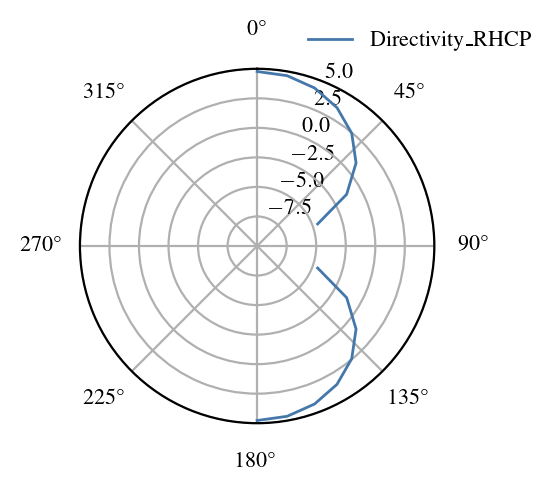

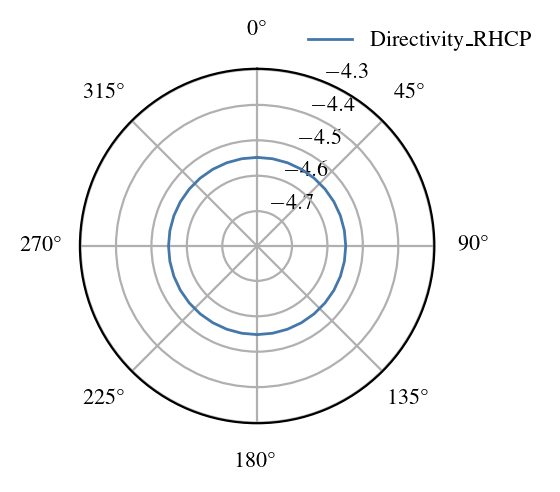

In [88]:
# Generate the pattern of a circular dipole antenna
# C. Balanis "Chapter 4 - Wire Antennas" in Antenna Theory Analysis and Design 3rd Edition, pp.151-159, Hoboken, New Jersey, Wiley 2005 ISBN 0-471-66782-X.
frequency = [5.373e6] # Hz
theta = np.arange(0, 190, 10)
phi = np.arange(0, 370, 10) # deg

theta_rad = np.radians(theta)
phi_rad = np.radians(phi)

phi_grid, theta_grid  = np.meshgrid(phi_rad, theta_rad)

def _directivity_rhcp_loop_antenna_generator(frequency, theta, phi): 
    return 1.5 * np.cos(theta)**2

URHCP = np.array(list(map(lambda theta: _directivity_rhcp_loop_antenna_generator(frequency, theta, phi), theta_grid.flatten()))).reshape(theta_grid.shape)

ULHCP= np.array(list(map(lambda theta: 0, theta_grid.flatten()))).reshape(theta_grid.shape)

circular_loop_antenna = ant.pattern(
    URHCP = URHCP[None, ...],
    ULHCP = ULHCP[None, ...],
    frequency = frequency,
    theta = theta,
    phi = phi
)

circular_loop_antenna.compute_directivity_RHCP()

frequency = circular_loop_antenna.data_array.coords['frequency'].values[0]
display(circular_loop_antenna.find_max('Directivity_RHCP'))
plt.figure()
ant.plot.polar_phi_cut(circular_loop_antenna, ['Directivity_RHCP'], frequency, 0)
plt.ylim(-10, 5)
plt.figure()
ant.plot.polar_theta_cut(circular_loop_antenna, ['Directivity_RHCP'], frequency, 70)



In [89]:
circular_loop_antenna.data_array.values[0, 0, ...]



array([[1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00, 1.50000000e+00, 1.50000000e+00, 1.50000000e+00,
        1.50000000e+00],
       [1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
        1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
        1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
        1.45476947e+00, 1.45476947e+00, 1.45476947e+00, 1.45476947e+00,
        1.45476947e+00, 1.45476947e+00,

In [84]:
phi_grid

array([[0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
        0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
        1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
        2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
        3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
        4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
        5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
        6.10865238, 6.28318531],
       [0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
        0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
        1.74532925, 1.91986218, 2.0943951 , 2.26892803, 2.44346095,
        2.61799388, 2.7925268 , 2.96705973, 3.14159265, 3.31612558,
        3.4906585 , 3.66519143, 3.83972435, 4.01425728, 4.1887902 ,
        4.36332313, 4.53785606, 4.71238898, 4.88692191, 5.06145483,
        5.23598776, 5.41052068, 5.58505361, 5.75958653, 5.93411946,
        6.10865

In [83]:
theta_grid

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.17453293, 0.17453293, 0.17453293, 0.17453293, 0.17453293,
        0.17453293, 0.17453293, 0.17453293, 0.17453293, 0.17453293,
        0.17453293, 0.17453293, 0.17453293, 0.17453293, 0.17453293,
        0.17453293, 0.17453293, 0.17453293, 0.17453293, 0.17453293,
        0.17453293, 0.17453293, 0.17453293, 0.17453293, 0.17453293,
        0.17453293, 0.17453293, 0.17453293, 0.17453293, 0.17453293,
        0.17453293, 0.17453293, 0.17453293, 0.17453293, 0.17453293,
        0.17453

In [69]:
# Generate the pattern of a constant current infinitesimal dipole oriented along the z-axis
# C. Balanis "Chapter 4 - Wire Antennas" in Antenna Theory Analysis and Design 3rd Edition, pp.151-159, Hoboken, New Jersey, Wiley 2005 ISBN 0-471-66782-X.
frequency = [5.373e6] # Hz
theta = np.arange(0, 180, 10)
phi = np.arange(0, 360, 10) # deg

theta_rad = np.radians(theta)
phi_rad = np.radians(phi)

phi_grid, theta_grid  = np.meshgrid(phi_rad, theta_rad)

def _directivity_theta_infintesiaml_dipole_generator(frequency, theta, phi): 
    return np.sin(theta) 

Directivity_Theta = np.array(list(map(lambda theta: _directivity_theta_infintesiaml_dipole_generator(frequency, theta, phi), theta_grid.flatten()))).reshape(theta_grid.shape)

Directivity_Phi = np.array(list(map(lambda theta: 0, theta_grid.flatten()))).reshape(theta_grid.shape)

ant.pattern(
    Directivity_Theta = Directivity_Theta[None, ...],
    Directivity_Phi = Directivity_Phi[None, ...],
    frequency = frequency,
    theta = theta,
    phi = phi
)

<xarray.DataArray (field: 2, frequency: 1, theta: 18, phi: 36)> Size: 10kB
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.17364818, 0.17364818, 0.17364818, ..., 0.17364818,
          0.17364818, 0.17364818],
         [0.34202014, 0.34202014, 0.34202014, ..., 0.34202014,
          0.34202014, 0.34202014],
         ...,
         [0.5       , 0.5       , 0.5       , ..., 0.5       ,
          0.5       , 0.5       ],
         [0.34202014, 0.34202014, 0.34202014, ..., 0.34202014,
          0.34202014, 0.34202014],
         [0.17364818, 0.17364818, 0.17364818, ..., 0.17364818,
          0.17364818, 0.17364818]]],


       [[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0

In [5]:
# Generate the pattern of a constant current infinitesimal dipole oriented along the z-axis
# C. Balanis "Chapter 4 - Wire Antennas" in Antenna Theory Analysis and Design 3rd Edition, pp.151-159, Hoboken, New Jersey, Wiley 2005 ISBN 0-471-66782-X.
frequency = [5.373e6] # Hz
theta = np.array(list(np.arange(0, 180, 10)) + [179])
phi = np.array(list(np.arange(0, 360, 10)) + [359])

theta_rad = np.radians(theta)
phi_rad = np.radians(phi)

phi_grid, theta_grid  = np.meshgrid(phi_rad, theta_rad)

Etheta = 377 * np.array(list(map(lambda theta: np.sin(theta), theta_grid.flatten()))).reshape(theta_grid.shape)
Ephi = 377 * np.array(list(map(lambda theta: 0, theta_grid.flatten()))).reshape(theta_grid.shape)
Hphi =  np.array(list(map(lambda theta: np.sin(theta), theta_grid.flatten()))).reshape(theta_grid.shape)
Htheta =  np.array(list(map(lambda theta: 0, theta_grid.flatten()))).reshape(theta_grid.shape)

hertzian_dipole_antenna = ant.pattern(
    Etheta = Etheta[None, ...],
    Ephi = Ephi[None, ...],
    Hphi = Hphi[None, ...],
    Htheta = Htheta[None, ...],
    frequency = frequency,
    theta = theta,
    phi = phi
)
hertzian_dipole_antenna.compute_Utheta_from_Etheta()
hertzian_dipole_antenna.compute_Uphi_from_Htheta()
hertzian_dipole_antenna.compute_directivity_theta()
hertzian_dipole_antenna.compute_directivity_phi()
hertzian_dipole_antenna

c:\Users\Jake Sahli\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\core\computation.py:821: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
c:\Users\Jake Sahli\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\core\computation.py:821: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


<xarray.DataArray (field: 8, frequency: 1, theta: 19, phi: 37)> Size: 45kB
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 6.54653630e+01,  6.54653630e+01,  6.54653630e+01, ...,
           6.54653630e+01,  6.54653630e+01,  6.54653630e+01],
         [ 1.28941594e+02,  1.28941594e+02,  1.28941594e+02, ...,
           1.28941594e+02,  1.28941594e+02,  1.28941594e+02],
         ...,
         [ 1.28941594e+02,  1.28941594e+02,  1.28941594e+02, ...,
           1.28941594e+02,  1.28941594e+02,  1.28941594e+02],
         [ 6.54653630e+01,  6.54653630e+01,  6.54653630e+01, ...,
           6.54653630e+01,  6.54653630e+01,  6.54653630e+01],
         [ 6.57955723e+00,  6.57955723e+00,  6.57955723e+00, ...,
           6.57955723e+00,  6.57955723e+00,  6.57955723e+00]]],


       [[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 

array([1.77304809])

array([-inf])

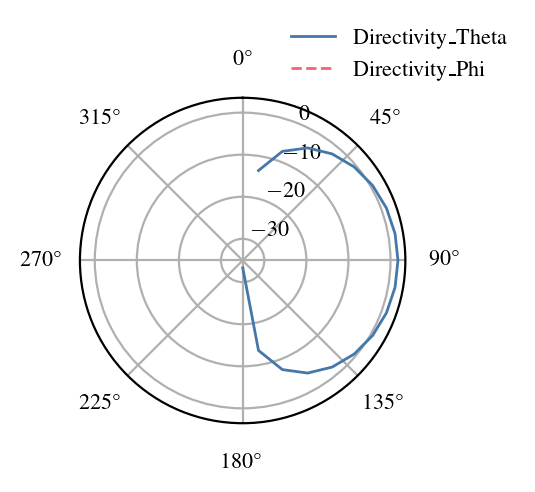

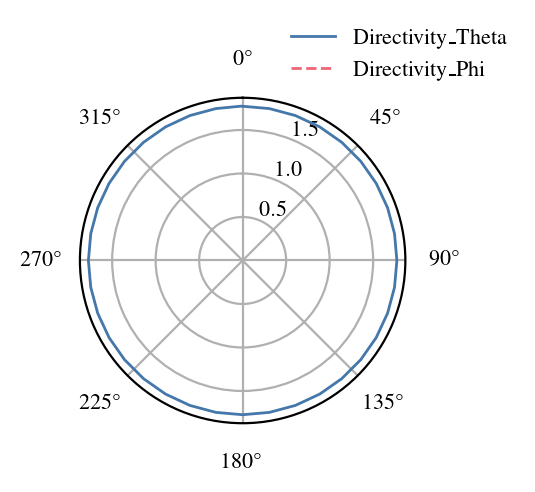

In [6]:
frequency = hertzian_dipole_antenna.data_array.coords['frequency'].values[0]
display(hertzian_dipole_antenna.find_max('Directivity_Theta'))
display(hertzian_dipole_antenna.find_max('Directivity_Phi'))
plt.figure()
ant.plot.polar_phi_cut(hertzian_dipole_antenna, ['Directivity_Theta', 'Directivity_Phi'], frequency, 0)
plt.figure()
ant.plot.polar_theta_cut(hertzian_dipole_antenna, ['Directivity_Theta','Directivity_Phi'], frequency, 90)



In [68]:
field = 'Etheta'
frequency = hertzian_dipole_antenna.data_array.coords['frequency'].values[0]
sind = lambda angle: np.sin(np.deg2rad(angle))
cosd = lambda angle: np.cos(np.deg2rad(angle))
Etheta = hertzian_dipole_antenna.data_array.loc[dict(field='Etheta', frequency=frequency)].values.copy()
Ephi = hertzian_dipole_antenna.data_array.loc[dict(field='Ephi', frequency=frequency)].values.copy()
phi = hertzian_dipole_antenna.data_array.coords['phi'].values.copy()
theta = hertzian_dipole_antenna.data_array.coords['theta'].values.copy()
rotation_theta = 30
rotation_phi = 0

Etheta_phase = np.angle(Etheta)
Ephi_phase = np.angle(Ephi)
psi = np.rad2deg(
    np.arctan(
        np.nan_to_num(
            np.abs(Etheta) / np.abs(Ephi))))


(phi + rotation_phi) % 360, (theta + rotation_theta) % 180

phi_grid, theta_grid = np.meshgrid(
    phi, 
    theta)

new_psi = psi + rotation_theta * np.abs(sind(phi_grid)) \
    + rotation_phi * np.abs(cosd(theta_grid))
new_psi = new_psi % 360 
Ephi = Ephi * np.abs(cosd(new_psi)) + Etheta * np.abs(sind(new_psi))
Etheta = Etheta * np.abs(cosd(new_psi)) + Ephi * np.abs(sind(new_psi))

e_psi = np.rad2deg(
    np.arctan(
        np.nan_to_num(
            np.abs(Etheta) / np.abs(Ephi))))
new_psi[13], e_psi[13]



C:\Users\Jake Sahli\AppData\Local\Temp\ipykernel_9032\102029309.py:17: RuntimeWarning: divide by zero encountered in divide
  np.abs(Etheta) / np.abs(Ephi))))
C:\Users\Jake Sahli\AppData\Local\Temp\ipykernel_9032\102029309.py:17: RuntimeWarning: invalid value encountered in divide
  np.abs(Etheta) / np.abs(Ephi))))
C:\Users\Jake Sahli\AppData\Local\Temp\ipykernel_9032\102029309.py:35: RuntimeWarning: invalid value encountered in divide
  np.abs(Etheta) / np.abs(Ephi))))


(array([ 90.        ,  95.20944533, 100.2606043 , 105.        ,
        109.28362829, 112.98133329, 115.98076211, 118.19077862,
        119.54423259, 120.        , 119.54423259, 118.19077862,
        115.98076211, 112.98133329, 109.28362829, 105.        ,
        100.2606043 ,  95.20944533,  90.        ,  95.20944533,
        100.2606043 , 105.        , 109.28362829, 112.98133329,
        115.98076211, 118.19077862, 119.54423259, 120.        ,
        119.54423259, 118.19077862, 115.98076211, 112.98133329,
        109.28362829, 105.        , 100.2606043 ,  95.20944533,
         90.52357219]),
 array([45.        , 47.38820983, 49.35891685, 50.9767944 , 52.29830324,
        53.36374171, 54.19458844, 54.7957584 , 55.1618218 , 55.28499605,
        55.1618218 , 54.7957584 , 54.19458844, 53.36374171, 52.29830324,
        50.9767944 , 49.35891685, 47.38820983, 45.        , 47.38820983,
        49.35891685, 50.9767944 , 52.29830324, 53.36374171, 54.19458844,
        54.7957584 , 55.1618218 , 5

In [61]:


range = lambda a: [np.max(a), np.min(a)]
range(new_psi), range(e_psi), range(psi)

([np.float64(30.0), np.float64(-90.0)],
 [np.float64(90.0), np.float64(0.0)],
 [np.float64(90.0), np.float64(0.0)])

In [21]:
np.arctan( 0 / 100), np.arctan( np.array(100) / np.array(0)), np.arctan( np.array(0) / np.array(0)),

C:\Users\Jake Sahli\AppData\Local\Temp\ipykernel_9032\1827657033.py:1: RuntimeWarning: divide by zero encountered in divide
  np.arctan( 0 / 100), np.arctan( np.array(100) / np.array(0)), np.arctan( np.array(0) / np.array(0)),
C:\Users\Jake Sahli\AppData\Local\Temp\ipykernel_9032\1827657033.py:1: RuntimeWarning: invalid value encountered in divide
  np.arctan( 0 / 100), np.arctan( np.array(100) / np.array(0)), np.arctan( np.array(0) / np.array(0)),


(np.float64(0.0), np.float64(1.5707963267948966), np.float64(nan))